In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import scipy.optimize as opt    
import array
from scipy.signal import find_peaks, peak_prominences, peak_widths
def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]
   
    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

In [2]:
def calculate_gamma(temperature,density,xHI,scale):
    '''Gamma = R(T)*ne/xHI, R(T) = 4.3e-13 * (T/1e4K)^{-0.7), ne = 0.82*nb.
    '''
    omega_b = 0.0479; h = 0.6814
    mean_nb = 1.123e-5/scale**3*omega_b*h**2
    nb = np.multiply(density ,mean_nb); ne = 0.82*nb
    R_T = 4.3e-13 * (np.divide(temperature,1e4))**(-0.7)
    gamma = R_T * ne / xHI
    
    return gamma

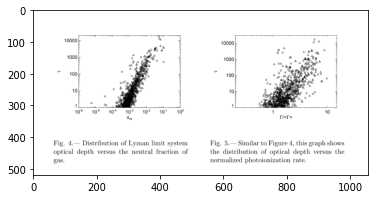

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('figure_four_five.png')
plt.imshow(img)
plt.show()


need to graph distribution of lyman limit system optical depth verus the neutral fraction of gas

In [4]:

def area_under_peak():
    #declare the data that will store the peak location and the area and the lyman limited that are found
    #temp array for both peak location and density area
    density_area =[]
    lyman_limited_distance =[]
    lyman_limited_counts = []
    lyman_limited_value = []
    temp_HI_density = []
    temp_distance = []
    all_HI_density = []
    all_distance =[]
    neutral_fraction = []
    temperature = []
    density =[]
    gamma =[]
    weird_temp =[]
    weird_gamma = []
    weird_area = []
    max = 0
    counts_lyman_limited = 0
    for i in range(1000):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance_cm = distance *0.1474*3.086e24 /0.68
        peak,properties = find_peaks(HI_density)
        mins, properties =find_peaks(HI_density*-1)
        closest_mins = [mins[np.argmin(np.abs(x-mins))] for x in peak]
        prominences, left_bases, right_bases = peak_prominences(HI_density,peak)
        width = peak_widths(HI_density,peak)
        counts_lyman_limited = 0
        #calculating area under the curve by multiplying the peak value by half of its width, assuming is peak is close to normally distributed
        #append to the lyman_limited series if conditions are satisfied
        #z,w are what is in the base corrsponsds to what value
        counts = 0
        temp_HI_density = []
        temp_distance = []
        weird_temp = []
        if(np.max(gas_metallicity) >= 0.02763):
            print(np.max(gas_metallicity))
        if(np.max(gas_density)>5.68):
            print(np.max(gas_density))
        for k,z,w,x in zip(peak,right_bases,left_bases,closest_mins): 
            area_under_the_curve = np.multiply(HI_density[k], abs(distance_cm[k]-distance_cm[x]))/0.937415
            counts +=1
            if(area_under_the_curve >= (1.6*10**17)and area_under_the_curve  <= (10**20) and HI_density[k]/(gas_density[k]) > 1e-4):
                lyman_limited_value.append(area_under_the_curve)
                neutral_fraction.append(HI_density[k]/gas_density[k])
                temperature.append(temp[k])
                density.append(gas_density[k])
                lyman_limited_distance.append([i,distance[z],counts])
                temp_distance.append(distance[k])
                temp_HI_density.append(k)
                gamma.append(calculate_gamma(temp[k],gas_density[k],HI_density[k]/gas_density[k],0.147))
                if(calculate_gamma(temp[k],gas_density[k],HI_density[k]/gas_density[k],0.147)/2.932467550656707e-17 >1 and area_under_the_curve >10e18):
                    weird_temp.append(k)
                    weird_area.append(area_under_the_curve)
                #count the lyman_limited per sight
                counts_lyman_limited += 1
        lyman_limited_counts.append(counts_lyman_limited)
        all_distance.append(temp_distance)
        all_HI_density.append(temp_HI_density)
        weird_gamma.append(weird_temp)
        density_area.append(HI_density[peak])
    return all_HI_density,left_bases,right_bases,lyman_limited_distance,lyman_limited_counts,all_distance,lyman_limited_value,neutral_fraction,temperature,density,gamma,weird_gamma,weird_area
all_HI_density,left_bases,right_bases,lyman_limited_distance,lyman_limited_counts,all_distance,lyman_limited_value,neutral_fraction,temperature, density,gamma,weird_gamma,weird_area = area_under_peak()


0.02763
0.03556
7.287
6.376
0.03204
40.33
0.03731
10.16
0.03124
46.71
0.02904
9.816
10.53
64.13
52.29
0.03127
0.02911
71.16


In [5]:
##weird gamma increases with lower area
weird_gamma

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [5921, 5923],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [6]:
weird_area

[1.906044280477577e+19,
 2.5100750108150215e+19,
 3.1912026856998105e+19,
 1.247637511692586e+19,
 4.751516691587901e+19,
 9.821511415327474e+19,
 9.810807470509423e+19]

In [7]:
def display_data(x,y):
    # get from raw file some physical properties along the LOS
    # creating the simple plot of HI_density Vs. distance 
    fig = plt.figure(figsize=(20, 2))
    ax = fig.add_subplot(111)
    ax.plot(x,y)

In [8]:
def display_peak(x,y):
        # finding the peak in each of the graphs
        fig = plt.figure(figsize=(20, 2))
        ax = fig.add_subplot(111)
        ax.plot(x,y)
        #find peaks function from scipy after changing the width and prominence for better results, width is the bin? which is 1.75 chimps
        peak,properties = find_peaks(y)
        ax.plot(x[peak],y[peak],'bo')
        plt.show()


In [9]:
def display_gamma(x,y,i):
        fig = plt.figure(figsize=(20, 2))
        ax = fig.add_subplot(111)
        ax.plot(x,y)
        print(x[weird_gamma[i]])
        ax.plot(x[weird_gamma[i]],y[weird_gamma[i]],'bo')   
        plt.show()

In [10]:
def display_lyman_peak(x,y,x1,y1):
    fig = plt.figure(figsize=(20, 2))
    ax = fig.add_subplot(111)
    ax.plot(x1, y1)
        #find peaks function from scipy after changing the width and prominence for better results, width is the bin? which is 1.75 chimps
    peak,properties = find_peaks(y1)
    ax.plot(x1[y],y1[y],'bo')
    plt.show()

In [11]:
def display_all():
    ##for i in range(10):
        i = 51
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        ##scaling factor for chimp, this is in cm. is multiplied by the scale(listed on simulation data), the mpc, and h(hobble constant)
        display_data(distance,HI_density)
        display_peak(distance,HI_density)
        display_lyman_peak(all_distance[i],all_HI_density[i],distance,HI_density)
        display_gamma(distance,HI_density,i)

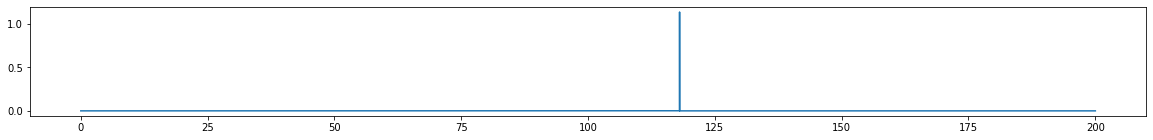

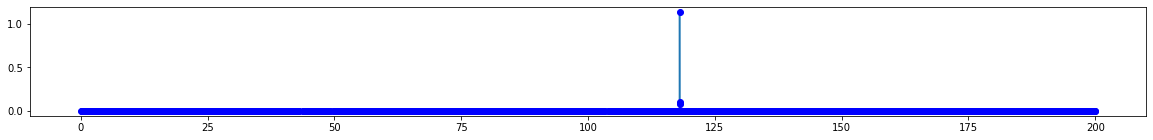

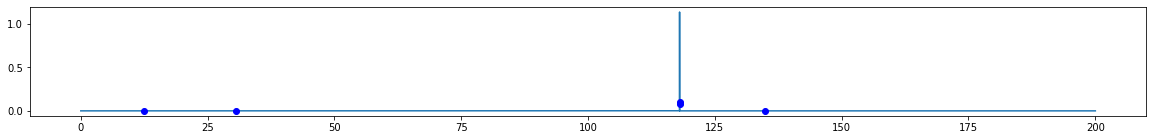

[118.04046 118.04113]


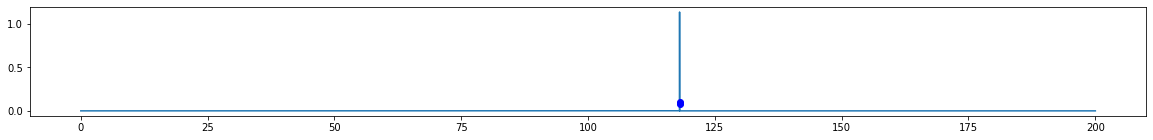

In [12]:
display_all()

(118.0, 118.2)

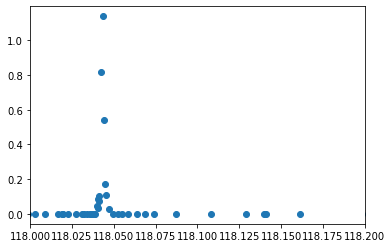

In [13]:
raw_path = 'los.00' + '{0:03}'.format(51) +'.raw'
distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
f,(ax) = plt.subplots(1,sharey=True, facecolor='w')
ax.scatter(distance,HI_density)
ax.set_xlim(118,118.2)

In [14]:
sigma = 6.3e-18

In [15]:
optical_depth = np.multiply(sigma,lyman_limited_value)

In [16]:
lyman_limited_value

[1.0365952572086292e+19,
 2.752340956996964e+18,
 5.272099469599771e+18,
 5.403008712157654e+17,
 2.834529554435347e+17,
 9.83180860970408e+17,
 3.167225850086339e+18,
 9.111197650856333e+17,
 9.64425409237058e+17,
 5.700642595993707e+19,
 2.135451221327557e+17,
 8.467933395678264e+18,
 2.0775714249182e+17,
 1.0062107546023853e+18,
 1.953755329574536e+19,
 1.6113247240295997e+19,
 9.179346098074986e+17,
 5.720473437425401e+19,
 4.691488970227252e+19,
 3.9407642471082476e+19,
 1.4025564155796986e+19,
 5.1220515741262464e+17,
 5.866125579575336e+18,
 1.0571817970761523e+18,
 2.3929381768787087e+18,
 2.918266370364599e+17,
 5.565023617837413e+19,
 8.031469350264198e+19,
 7.463881983491581e+17,
 4.520047457372123e+17,
 1.5636893161018557e+18,
 9.81072897498775e+18,
 5.923748481379882e+18,
 3.146959714941707e+17,
 3.7794986176339846e+17,
 1.6742127534696378e+17,
 2.7150626859425645e+17,
 4.1216180952208845e+17,
 1.6332278490841367e+18,
 3.840575325593589e+18,
 1.9564698499431436e+19,
 2.163

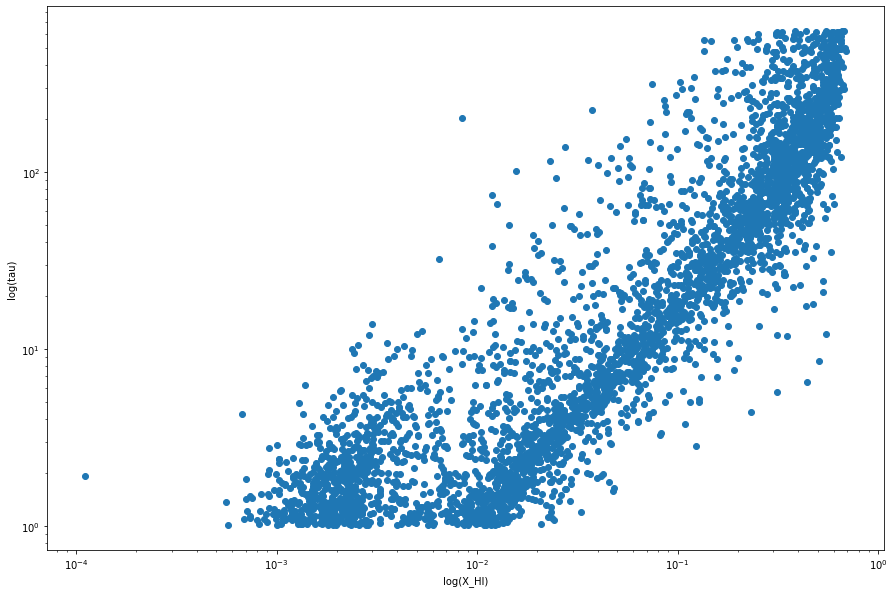

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("log(X_HI)")
ax.set_ylabel("log(tau)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(neutral_fraction,optical_depth)


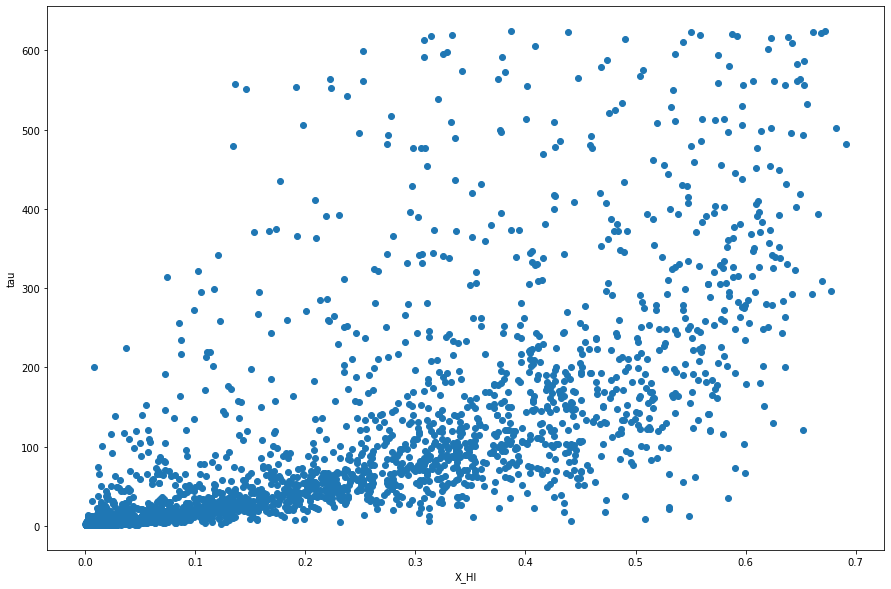

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("X_HI")
ax.set_ylabel("tau")
ax.scatter(neutral_fraction,optical_depth)


In [19]:
def average_gamma(gamma):
    average = 0
    for i in (gamma):
        average += i
    average = average/(len(gamma))
    return average
average = average_gamma(gamma)
average

4.913380746731213e-16

(0.0, 20.0)

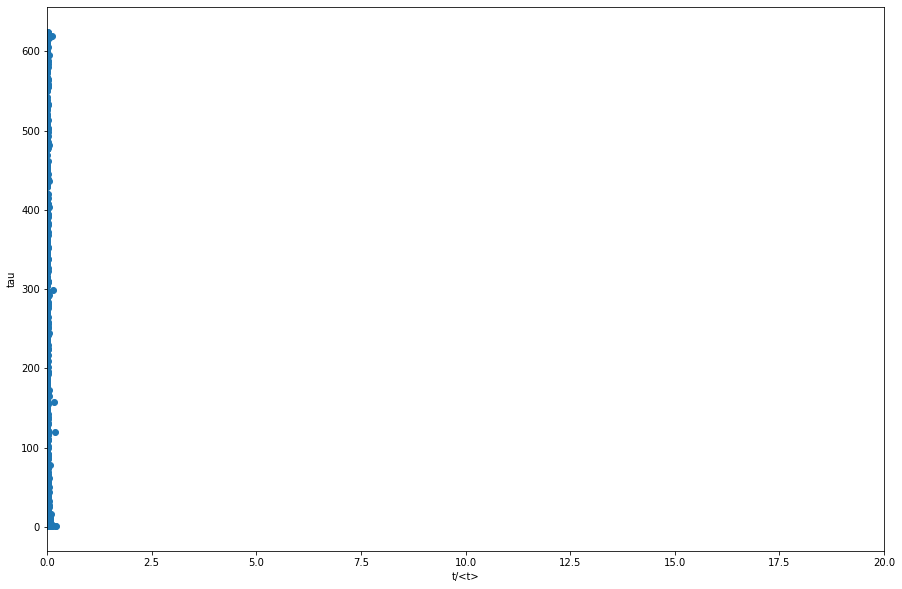

In [20]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("t/<t>")
ax.set_ylabel("tau")
ax.scatter(gamma/average,optical_depth)
ax.set_xlim(0,20)

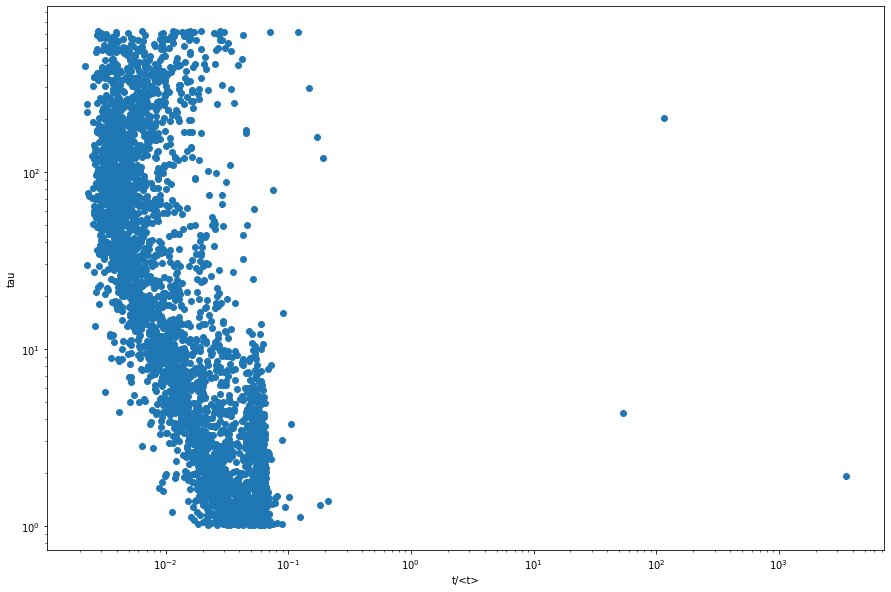

In [21]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("t/<t>")
ax.set_ylabel("tau")
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(abs(gamma/average),optical_depth)